In [1]:
import numpy as np
from numpy.random import uniform
from matplotlib import pyplot as plt
from sklearn import neighbors
from itertools import combinations
%matplotlib inline

In [2]:
test_size = 10000
trials = 100
X_test = uniform(0, 1, size=(test_size, 20))
Y1_test= (X_test[:,0]>0.5) + np.zeros(test_size)
Y2_test = (np.sum(X_test[:,:10], axis=1)>5) + np.zeros(test_size)

In [3]:
k_means_gen_erros = {k: [] for k in [50, 40, 30, 20, 10, 7, 3, 1]}

In [4]:
for k in k_means_gen_erros:
    for t in range(trials):
        X = uniform(0, 1, size=(80, 20))
        Y1= (X[:,0]>0.5) + np.zeros(80)
        knn = neighbors.KNeighborsRegressor(k)
        predict = knn.fit(X, Y1).predict(X_test)
        k_means_gen_erros[k].append(np.mean((Y1_test - predict) ** 2))
    break

In [5]:
k_means_pred_errors = []
k_means_bias = []
k_means_variance = []

for k in sorted(k_means_gen_erros):
    tmp = np.zeros((test_size, trials))
    err = []
    for t in range(trials):
        X = uniform(0, 1, size=(80, 20))
        Y1= (X[:,0]>0.5) + np.zeros(80)
        knn = neighbors.KNeighborsRegressor(k)
        predict = knn.fit(X, Y1).predict(X_test)
        tmp[:,t] = predict
        err.append(np.mean((Y1_test - predict)**2))
    bias, variance = np.mean((np.mean(tmp, axis=1) - Y1_test)**2), np.mean(np.var(tmp, axis=1))
    k_means_pred_errors.append(np.mean(err))
    k_means_bias.append(bias)
    k_means_variance.append(variance)

(0, 0.4)

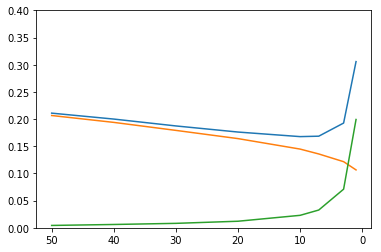

In [6]:
plt.plot(sorted(k_means_gen_erros), k_means_pred_errors)
plt.plot(sorted(k_means_gen_erros), k_means_bias)
plt.plot(sorted(k_means_gen_erros), k_means_variance)
plt.gca().invert_xaxis()
plt.ylim(0, 0.4)

In [7]:
p = 18
X_test_ = np.hstack((np.ones(shape=(X_test.shape[0], 1)), X_test))

In [8]:
p_vars = [0, 1, 2, 5, 7, 11, 14, 17, 20]
lr_pred_errors = []
lr_bias = []
lr_variance = []
trials = 10

for p in p_vars:
    tmp = np.zeros((test_size, trials))
    err = []
    for t in range(trials):
        X = uniform(0, 1, size=(80, 20))
        Y2 = (np.sum(X[:,:10], axis=1)>5) + np.zeros(80)
        X = np.hstack((np.ones(shape=(80, 1)), X))

        best_combination, best_beta, min_error = None, None, np.inf
        for predictors in combinations(list(range(1, 21)), p):
            predictors = [0] + list(predictors)
            X_ = X[:,predictors]
            beta = np.linalg.inv(X_.T @ X_) @ X_.T @ Y2
            y_hat = X_ @ beta
            error = np.mean((Y2 - y_hat) ** 2)
            if error < min_error:
                best_combination = predictors
                min_error = error
                best_beta = beta
        predict = X_test_[:,best_combination] @ best_beta
        tmp[:,t] = predict
        err.append(np.mean((Y2_test - predict)**2))
    bias, variance = np.mean((np.mean(tmp, axis=1) - Y2_test)**2), np.mean(np.var(tmp, axis=1))
    lr_pred_errors.append(np.mean(err))
    lr_bias.append(bias)
    lr_variance.append(variance)
    print(p, np.mean(err), bias, variance, np.mean(err)-bias-variance)

0 0.253677375 0.2500820624999999 0.0035953125000000013 5.724587470723463e-17
1 0.24385176507411388 0.202115273270708 0.0417364918034059 -1.3877787807814457e-17
2 0.22506907493644274 0.17744780686972325 0.04762126806671949 -6.938893903907228e-18
5 0.19194612831415525 0.1276817560335388 0.06426437228061645 1.3877787807814457e-17
7 0.1582227281707133 0.09956083140771382 0.0586618967629995 -1.3877787807814457e-17
11 0.1247734592465011 0.09232093004735505 0.03245252919914605 6.938893903907228e-18
14 0.11946491954343372 0.09178205315547272 0.027682866387961 -3.469446951953614e-18
17 0.12157879852726569 0.0937446776523781 0.02783412087488761 -1.3877787807814457e-17
20 0.11779790032279794 0.09256397186612367 0.025233928456674274 -3.469446951953614e-18


(0, 0.4)

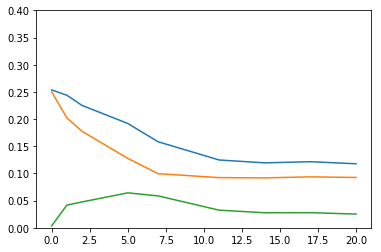

In [9]:
plt.plot(p_vars, lr_pred_errors)
plt.plot(p_vars, lr_bias)
plt.plot(p_vars, lr_variance)
plt.ylim(0, 0.4)